In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model
)

In [62]:
dataset = datasets.load_diabetes()

In [63]:
linreg = linear_model.LinearRegression()

In [64]:
# creating the leave one out cv.
loo = skms.LeaveOneOut()
scores = skms.cross_val_score(linreg, dataset.data, dataset.target, cv=loo, scoring="neg_mean_squared_error")

In [65]:
scores = pd.Series(np.sqrt(-scores))
scores

0      56.106575
1       7.087310
2      36.748070
3      39.851664
4       6.623426
         ...    
437    15.221983
438     3.024893
439    10.922023
440     8.254315
441     3.816473
Length: 442, dtype: float64

In [66]:
df = pd.DataFrame({"RMSE": scores})
df.index.name = "Repeat"

In [67]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,442.0,44.355723,32.19733,0.208637,18.485262,39.548204,63.974315,158.233013


Text(0.5, 3.722222222222216, 'Repeats')

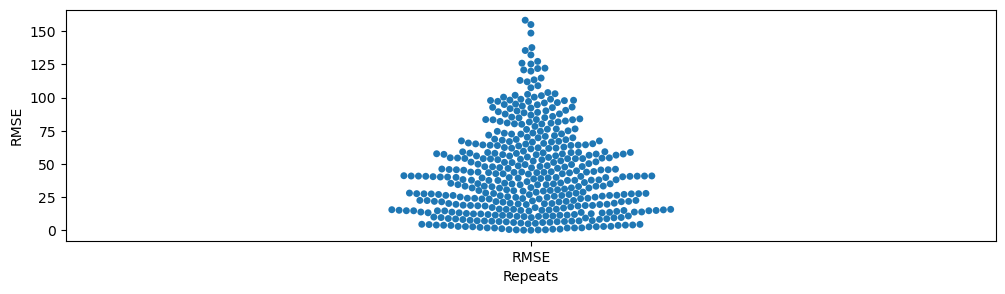

In [68]:
ax = plt.figure(figsize=(12, 3)).gca()
ax = sns.swarmplot(data=df)
ax.set_ylabel("RMSE")
ax.set_xlabel("Repeats")